In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\k\Downloads\data 8 mall customer\mallcustomer.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(["CustomerID"], axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
encoder = LabelEncoder()
Gender_ec = encoder.fit_transform(df.iloc[:,0])

In [6]:
df["Gender"] = Gender_ec

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [9]:
df1 = pd.DataFrame(data = scaled, columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

In [10]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [11]:
pca = PCA(n_components = 2)
df2 = pca.fit_transform(df1)

In [12]:
df2.shape

(200, 2)

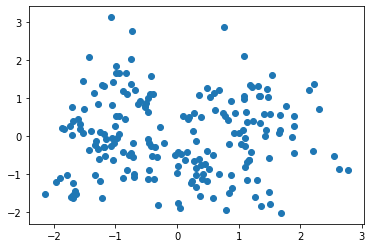

In [13]:
plt.scatter(df2[:, 0], df2[:, 1])

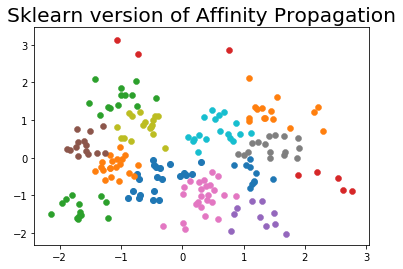

In [14]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    #plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Affinity Propagation")
    plt.style.use('fivethirtyeight')

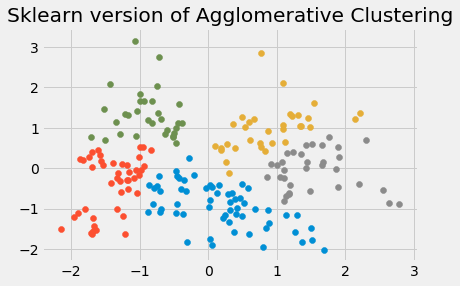

In [15]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Agglomerative Clustering")
    plt.style.use('fivethirtyeight')
    

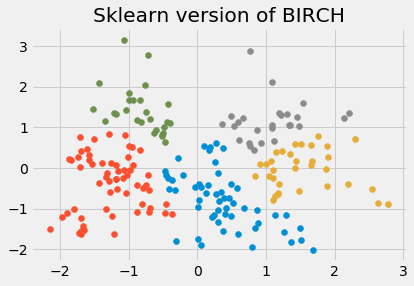

In [16]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=5)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of BIRCH")
    plt.style.use('fivethirtyeight')

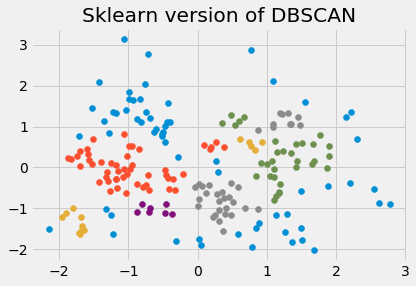

In [17]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of DBSCAN")
    plt.style.use('fivethirtyeight')

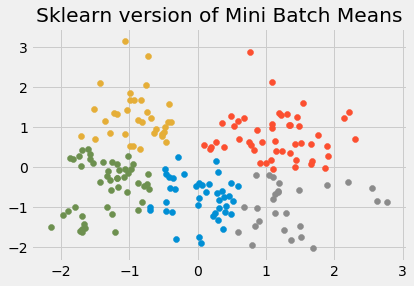

In [18]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=5)
model.fit(df2)
yhat = model.predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
##plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker = '+', label='Clusters', c = "red")
    plt.title("Sklearn version of Mini Batch Means")
    plt.style.use('fivethirtyeight')

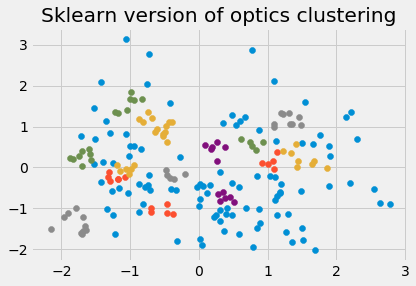

In [19]:
from sklearn.cluster import OPTICS

model = OPTICS(eps=0.8)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of optics clustering")
    plt.style.use('fivethirtyeight')

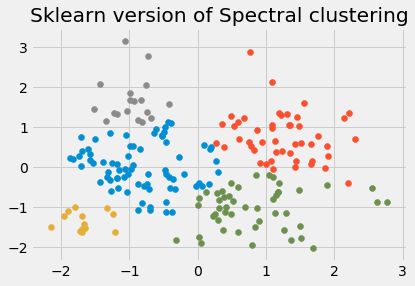

In [20]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters = 5)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Spectral clustering")
    plt.style.use('fivethirtyeight')

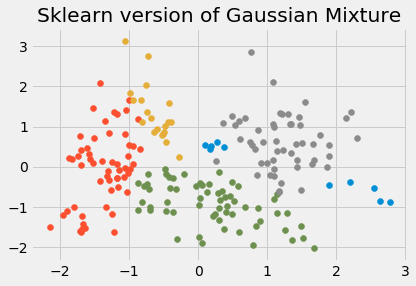

In [21]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components = 5)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of Gaussian Mixture")
    plt.style.use('fivethirtyeight')

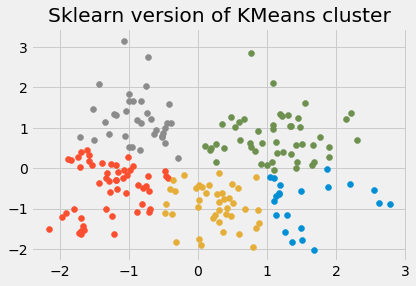

In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 5)
yhat = model.fit_predict(df2)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(df2[row_ix, 0], df2[row_ix, 1])
    plt.title("Sklearn version of KMeans cluster")
    plt.style.use('fivethirtyeight')

In [23]:
print(model.labels_)

[2 1 2 1 2 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 2 2 1 0 1 0 1 0 1 2
 1 2 1 0 1 3 1 2 1 2 1 2 2 2 4 1 3 2 3 2 0 1 3 3 4 0 2 3 4 2 0 4 2 3 2 2 2
 3 4 2 3 1 2 3 3 3 2 1 3 2 1 1 2 0 4 3 2 2 4 2 1 3 4 1 2 3 4 3 1 0 3 3 3 3
 1 2 4 1 1 0 2 2 2 4 2 2 4 1 1 3 4 3 4 3 4 1 1 3 1 0 4 3 1 0 4 1 1 3 4 3 1
 2 4 3 4 2 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 4 3 4 3 4 3 1 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [24]:
# Nice Pythonic way to get the indices of the points for each corresponding cluster
mydict = {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
dictlist = []
for key, value in mydict.items():
    temp = [key, value]
    dictlist.append(temp)

In [25]:
#This list contains indices of objects in the cluster
dictlist[0]

[0,
 array([  8,  10,  12,  14,  18,  22,  24,  30,  32,  34,  40,  57,  62,
         67,  90, 106, 116, 136, 140, 154, 160], dtype=int64)]

In [26]:
## To get the array of our original encoded dataset 
df3 = df.values

In [27]:
## To get items from the original dataset
accessed_mapping = map(df3.__getitem__, dictlist[0])
cl1 = list(accessed_mapping)
cluster_1 = pd.DataFrame(cl1[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[1])
cl2 = list(accessed_mapping)
cluster_2 = pd.DataFrame(cl2[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[2])
cl3 = list(accessed_mapping)
cluster_3 = pd.DataFrame(cl3[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[3])
cl4 = list(accessed_mapping)
cluster_4 = pd.DataFrame(cl4[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])

accessed_mapping = map(df3.__getitem__, dictlist[4])
cl5 = list(accessed_mapping)
cluster_5 = pd.DataFrame(cl5[1], columns = ["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"])


In [28]:
## The objects in clusters
cluster_1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,64,19,3
1,1,67,19,14
2,0,58,20,15
3,1,37,20,13
4,1,52,23,29
5,0,46,25,5
6,0,54,28,14
7,1,60,30,4
8,1,53,33,4
9,0,49,33,14


In [29]:
## Final Report of Cluster 1
print("*" * 75)
print("The Average age of Customers in cluster 1 is:")
print(cluster_1.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 1 are:")
print(cluster_1["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 1 is:")
print(cluster_1["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 1 is:")
print(cluster_1["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 1 is:
57.61904761904762
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 1 are:
0    14
1     7
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 1 is:
43.76190476190476
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 1 is:
0    14
dtype: int64
***************************************************************************


In [30]:
## Final Report of Cluster 2
print("*" * 75)
print("The Average age of Customers in cluster 2 is:")
print(cluster_2.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 2 are:")
print(cluster_2["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 2 is:")
print(cluster_2["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 2 is:")
print(cluster_2["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 2 is:
26.67924528301887
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 2 are:
0    45
1     8
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 2 is:
50.886792452830186
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 2 is:
0    73
dtype: int64
***************************************************************************


In [31]:
## Final Report of Cluster 3

print("*" * 75)
print("The Average age of Customers in cluster 3 is:")
print(cluster_3.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 3 are:")
print(cluster_3["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 3 is:")
print(cluster_3["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 3 is:")
print(cluster_3["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 3 is:
42.31707317073171
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 3 are:
0    38
1     3
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 3 is:
46.853658536585364
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 3 is:
0    42
dtype: int64
***************************************************************************


In [32]:
## Final Report of Cluster 4

print("*" * 75)
print("The Average age of Customers in cluster 4 is:")
print(cluster_4.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 4 are:")
print(cluster_4["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 4 is:")
print(cluster_4["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 4 is:")
print(cluster_4["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 4 is:
47.22
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 4 are:
1    41
0     9
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 4 is:
75.24
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 4 is:
0    46
dtype: int64
***************************************************************************


In [33]:
## Final Report of Cluster 5

print("*" * 75)
print("The Average age of Customers in cluster 5 is:")
print(cluster_5.Age.mean())
print("*" * 75)
print("The Number of Male(1) and female(0) customers in cluster 5 are:")
print(cluster_5["Gender"].value_counts())
print("*" * 75)
print("The Average annual income (in dollars) of Customers in category 5 is:")
print(cluster_5["Annual Income (k$)"].mean())
print("*" * 75)
print("The Mean,Median and Mode of spending Score of people in category 5 is:")
print(cluster_5["Spending Score (1-100)"].mode())
print("*" * 75)

***************************************************************************
The Average age of Customers in cluster 5 is:
30.0
***************************************************************************
The Number of Male(1) and female(0) customers in cluster 5 are:
1    29
0     6
Name: Gender, dtype: int64
***************************************************************************
The Average annual income (in dollars) of Customers in category 5 is:
80.37142857142857
***************************************************************************
The Mean,Median and Mode of spending Score of people in category 5 is:
0    75
dtype: int64
***************************************************************************
